In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import display
%matplotlib inline

In [32]:
mnist = load_digits()

In [35]:
type(mnist)

sklearn.utils._bunch.Bunch

In [39]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [36]:
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


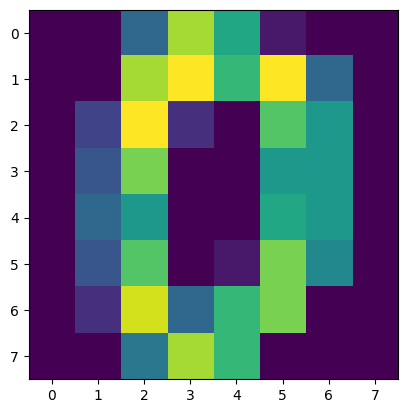

In [33]:
plt.imshow(mnist.images[0]);

In [34]:
x = mnist.data
y = mnist.target

In [37]:
# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# # Comparando com Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 0.8416666666666667


In [44]:
# Comparando com o Random Forest
clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Calcular e imprimir a precisão do Random Forest
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

Precisão: 0.9694444444444444


In [48]:
# Criar e treinar o XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Calcular e imprimir a precisão do XGBoost
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisão: 0.975


/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [01:11:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisão: 0.975

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360



<Figure size 2000x1000 with 0 Axes>

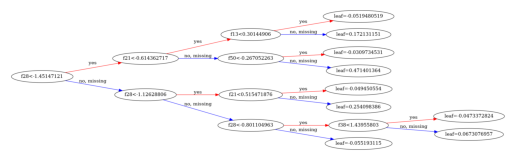

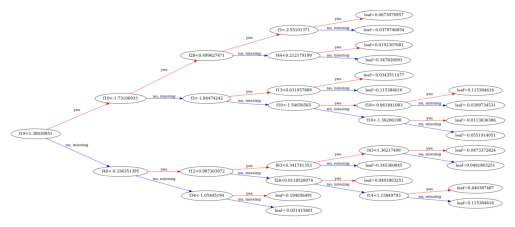

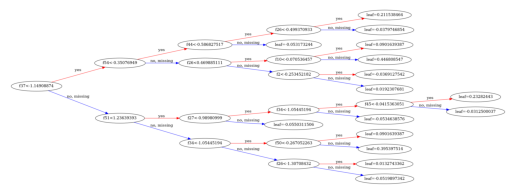

In [66]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset MNIST
mnist = load_digits()

x = mnist.data
y = mnist.target

# Normalizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Calcular e imprimir a precisão do XGBoost
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


# Visualizar algumas árvores do XGBoost
num_trees_to_plot = 3  # Número de árvores a serem visualizadas
plt.figure(figsize=(20, 10))
for i in range(num_trees_to_plot):
    plot_tree(clf, num_trees=i, rankdir='LR')
    plt.show()


Dataset: MNIST
Gini Impurity (Train): 0.8999
Entropy (Train): 3.3209

Decision Tree with Gini Impurity
Precisão: 0.8416666666666667

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



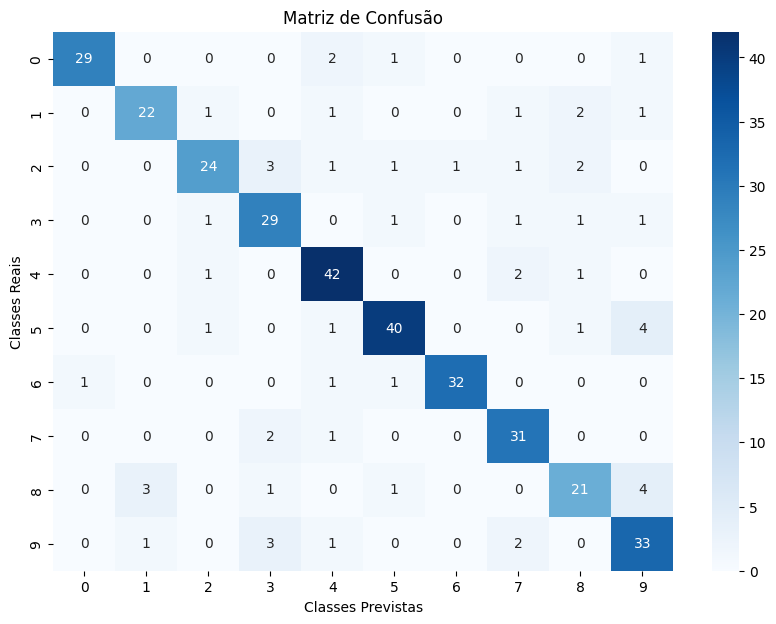


Decision Tree with Entropy
Precisão: 0.8888888888888888

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.90      0.79      0.84        33
           3       0.91      0.85      0.88        34
           4       0.80      0.87      0.83        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.88      0.86        34
           8       0.86      0.83      0.85        30
           9       0.88      0.90      0.89        40

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



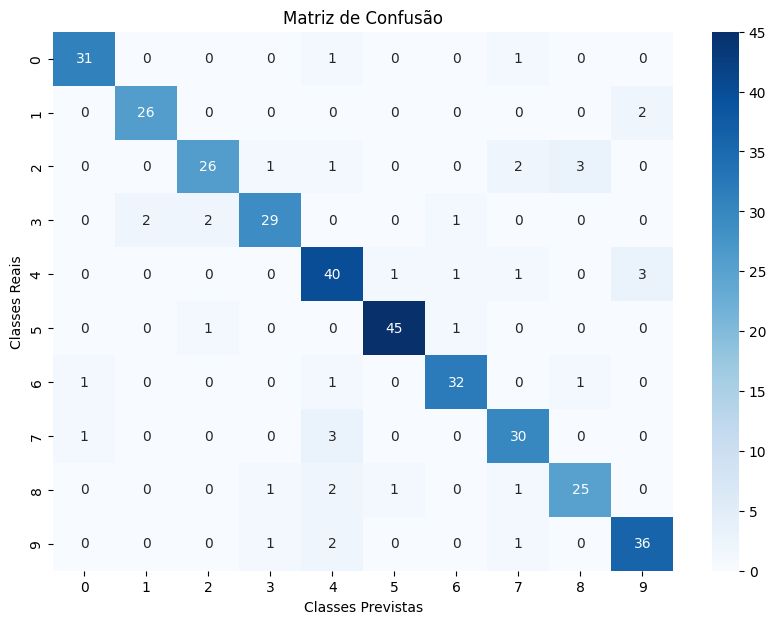

Dataset: Iris
Gini Impurity (Train): 0.6665
Entropy (Train): 1.5847

Decision Tree with Gini Impurity
Precisão: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



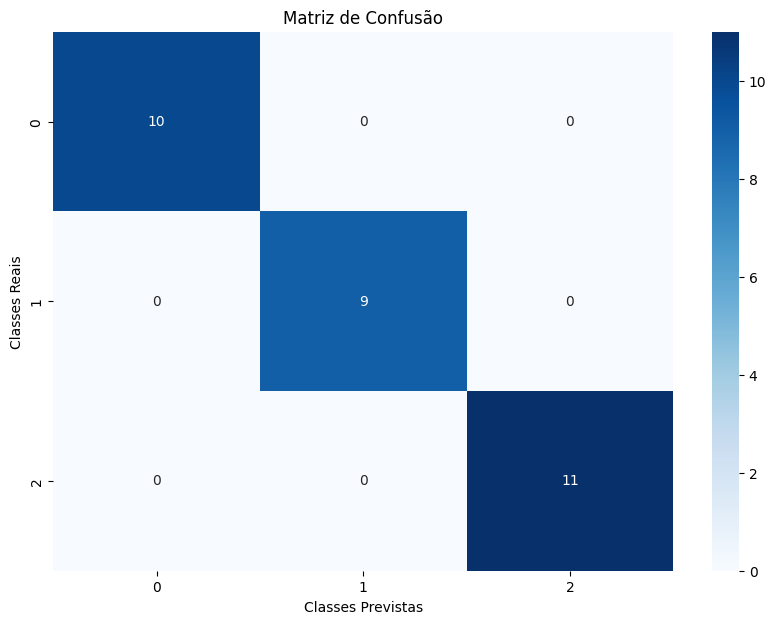


Decision Tree with Entropy
Precisão: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



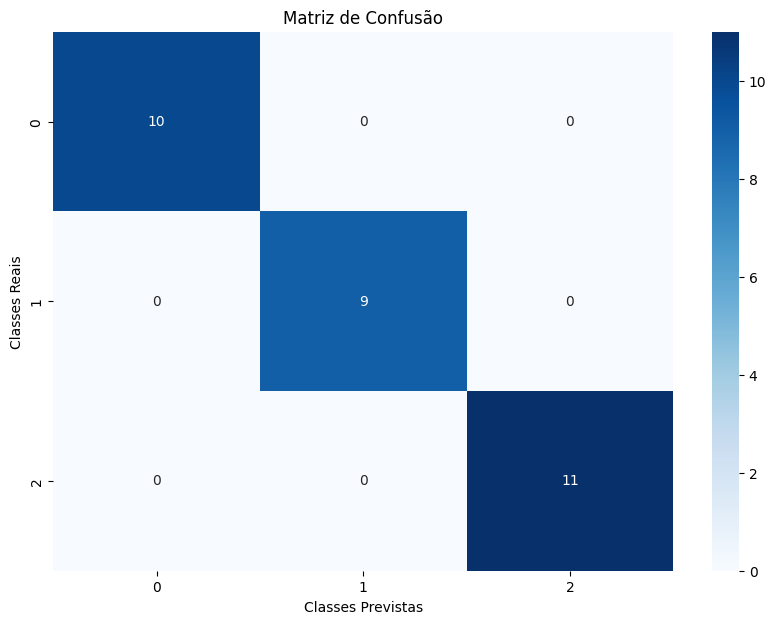

In [61]:
import numpy as np
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Funções para calcular Gini Impurity e Entropy
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities**2)

def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # adicionamos 1e-9 para evitar log(0)

# Função para exibir métricas
def display_metrics(y_test, y_pred):
    print("Precisão:", accuracy_score(y_test, y_pred))
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title("Matriz de Confusão")
    plt.xlabel("Classes Previstas")
    plt.ylabel("Classes Reais")
    plt.show()

# Carregar o dataset MNIST
mnist = load_digits()
x_mnist = mnist.data
y_mnist = mnist.target

# Carregar o dataset Iris
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

# Dividir os datasets em treinamento e teste
datasets = {
    "MNIST": (x_mnist, y_mnist),
    "Iris": (x_iris, y_iris)
}

for name, (x, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Calcular impurezas nos dados de treinamento
    gini_train = gini_impurity(y_train)
    entropy_train = entropy(y_train)
    
    print(f"Dataset: {name}")
    print(f"Gini Impurity (Train): {gini_train:.4f}")
    print(f"Entropy (Train): {entropy_train:.4f}")

    # Treinar uma Decision Tree com critério Gini
    clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    print("\nDecision Tree with Gini Impurity")
    display_metrics(y_test, y_pred_gini)

    # Treinar uma Decision Tree com critério Entropy
    clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    print("\nDecision Tree with Entropy")
    display_metrics(y_test, y_pred_entropy)
